In [21]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('cancer patient data sets.csv')

# Display the first few rows of the DataFrame
print(df.head())


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [23]:
rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 1000
Number of columns: 26


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [25]:
features = df.iloc[:, :-1]  
prediction = df.iloc[:, -1]
print("Features:")
print(features.head())

print("\nPrediction:")
print(prediction.head())

Features:
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  \
0                     4             3                     2  ...   
1                     3             4                     2  ...   
2                     5             5                     4  ...   
3                     7             6                     7  ...   
4                     7             7                     6  ...   

   Coughing of Blood  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0                  4        3      

In [26]:
features.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [27]:
from sklearn.preprocessing import StandardScaler
numeric_df = df.select_dtypes(include=['number'])

numeric_df.dropna(inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)
scaled_df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,-1.730320,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,...,-0.353971,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655
1,-1.726856,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,...,-0.766045,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245
2,-1.723391,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
3,-1.719927,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,...,1.294323,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105
4,-1.716463,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205


In [28]:
df1 = scaled_df.drop('index', axis=1)
df1.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.353971,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-0.766045,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.294323,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,1.294323,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,1.706397,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205


In [29]:
prediction.head()

0       Low
1    Medium
2      High
3      High
4      High
Name: Level, dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df1, prediction, test_size=0.2, random_state=42)

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 800
Testing set size: 200


In [34]:
X_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
29,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-1.178119,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105
535,1.318890,-0.819903,1.064362,1.312250,0.926842,1.025275,0.667941,1.418061,1.175473,-0.689782,...,0.470176,0.509919,-0.841101,0.332758,-0.870694,-0.328743,-0.805663,-1.384593,1.544171,2.085555
695,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-1.178119,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105
557,2.068922,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,-1.167040,-0.218941,...,-0.766045,-0.827281,1.426018,0.770597,0.599246,-1.210093,2.127068,-0.292643,0.072130,-0.628245
836,0.068836,-0.819903,-0.906679,-0.596755,-0.083340,-1.348047,-1.683965,-1.829407,-1.635543,-1.631465,...,-0.353971,-0.827281,-1.294525,-0.542921,0.109266,0.993281,-1.224625,-0.292643,-0.909231,-0.628245


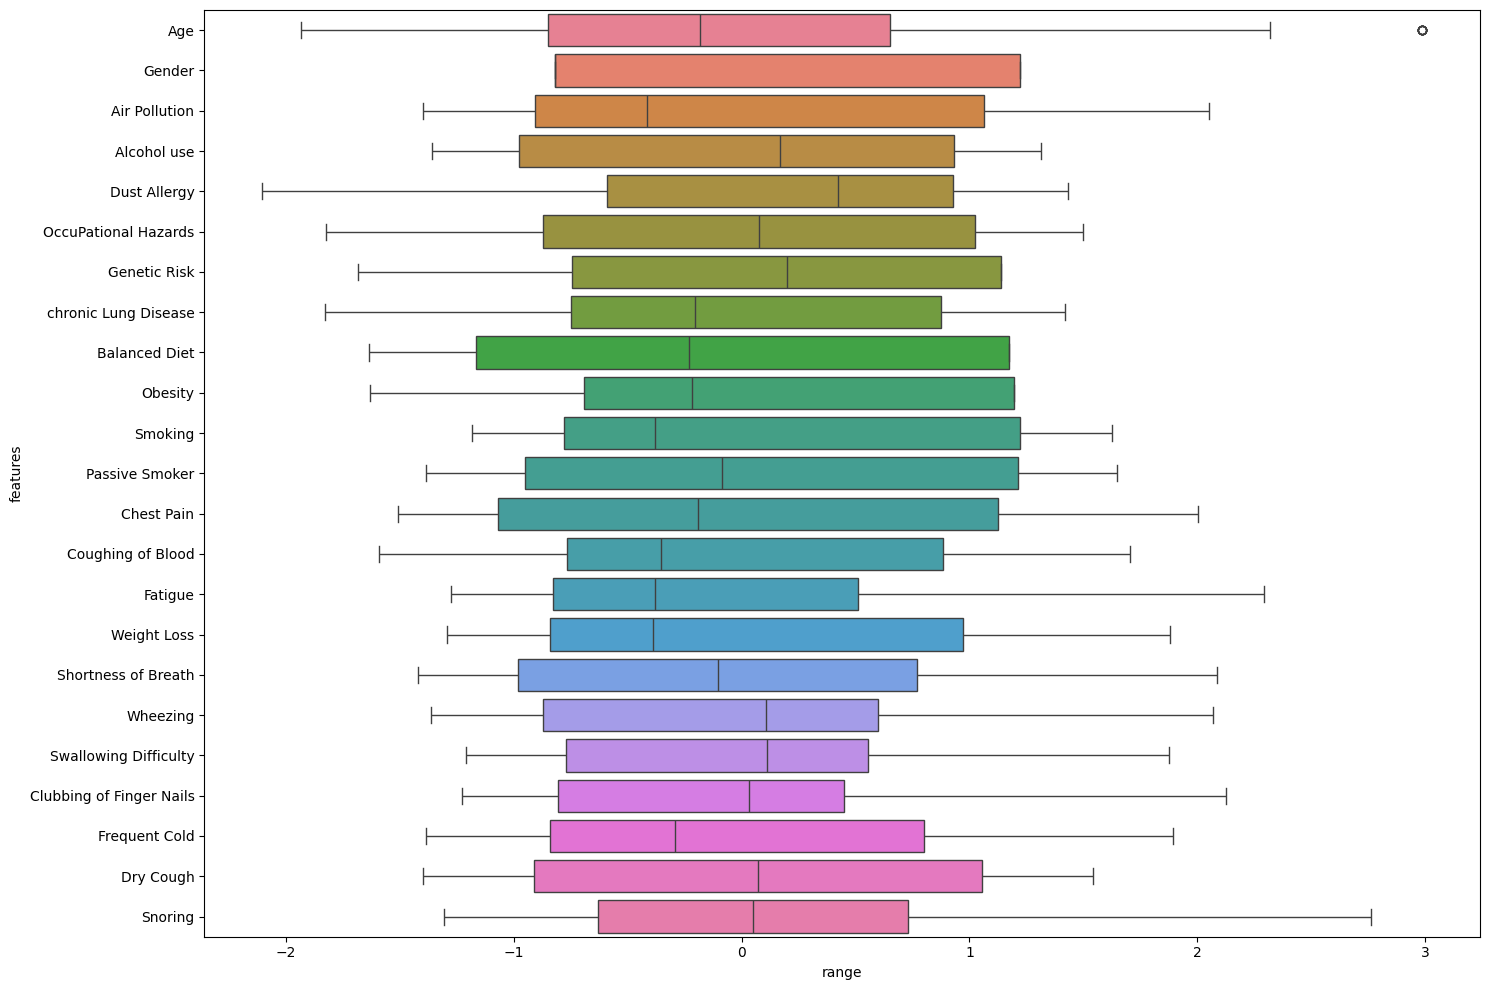

In [35]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train, orient='h').set(xlabel='range',ylabel='features')
plt.tight_layout()

In [36]:
X_test.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
521,0.902205,1.219657,-1.399439,0.548648,0.926842,1.499940,1.138323,0.876816,1.175473,1.193582,...,0.882250,-0.381548,-0.841101,0.770597,0.109266,-0.769418,-0.386702,-1.384593,-0.909231,-1.306694
737,2.068922,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,-1.167040,-0.218941,...,-0.766045,-0.827281,1.426018,0.770597,0.599246,-1.210093,2.127068,-0.292643,0.072130,-0.628245
740,-1.264554,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,-1.167040,-0.218941,...,-0.766045,-0.827281,1.426018,0.770597,0.599246,-1.210093,2.127068,-0.292643,0.072130,-0.628245
660,-0.014501,1.219657,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,1.294323,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105
411,0.735531,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-1.178119,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       200 non-null    float64
 1   Gender                    200 non-null    float64
 2   Air Pollution             200 non-null    float64
 3   Alcohol use               200 non-null    float64
 4   Dust Allergy              200 non-null    float64
 5   OccuPational Hazards      200 non-null    float64
 6   Genetic Risk              200 non-null    float64
 7   chronic Lung Disease      200 non-null    float64
 8   Balanced Diet             200 non-null    float64
 9   Obesity                   200 non-null    float64
 10  Smoking                   200 non-null    float64
 11  Passive Smoker            200 non-null    float64
 12  Chest Pain                200 non-null    float64
 13  Coughing of Blood         200 non-null    float64
 14  Fatigue       

In [38]:
vertical_concatenated5 = pd.concat([df1,prediction], axis='columns')
vertical_concatenated5.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,-0.347848,-0.819903,-0.906679,-0.214954,-0.083340,-0.398718,-0.743202,-1.288162,-1.167040,-0.218941,...,-0.381548,0.065746,-0.980760,-0.870694,-0.328743,-1.224625,-0.838618,-0.418550,0.728655,Low
1,-1.681238,-0.819903,-0.413919,-1.360357,-0.083340,-0.873383,-0.272821,-1.288162,-1.167040,-1.160623,...,-1.273014,-0.387677,1.208436,2.069186,0.993281,-0.805663,-1.384593,1.544171,-0.628245,Medium
2,-0.181174,-0.819903,0.078842,0.166847,0.421751,0.075946,0.197560,-0.205673,0.706970,1.193582,...,1.847119,1.426018,2.084114,-0.870694,-1.210093,0.032260,1.345283,1.544171,-0.628245,High
3,-0.014501,-0.819903,1.557123,0.930449,0.926842,1.025275,0.667941,1.418061,1.175473,1.193582,...,0.064186,-0.841101,-0.542921,-1.360675,0.111931,0.451222,1.345283,1.544171,1.407105,High
4,0.735531,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,1.175473,1.193582,...,-0.381548,-0.841101,-0.105081,-1.360675,0.111931,-0.805663,0.253332,-0.909231,0.050205,High


In [39]:
correlation_matrix = X_train.corr(method='pearson')

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                               Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.191854       0.112653     0.165493   
Gender                   -0.191854  1.000000      -0.203383    -0.190985   
Air Pollution             0.112653 -0.203383       1.000000     0.741563   
Alcohol use               0.165493 -0.190985       0.741563     1.000000   
Dust Allergy              0.038223 -0.172967       0.633122     0.817817   
OccuPational Hazards      0.065675 -0.161403       0.602032     0.878278   
Genetic Risk              0.075813 -0.191884       0.699965     0.875171   
chronic Lung Disease      0.135160 -0.176208       0.626605     0.767691   
Balanced Diet             0.029733 -0.083566       0.530337     0.662692   
Obesity                   0.055017 -0.097011       0.584651     0.662544   
Smoking                   0.106532 -0.196322       0.480207     0.556474   
Passive Smoker            0.032187 -0.158414       0.603147     0.59

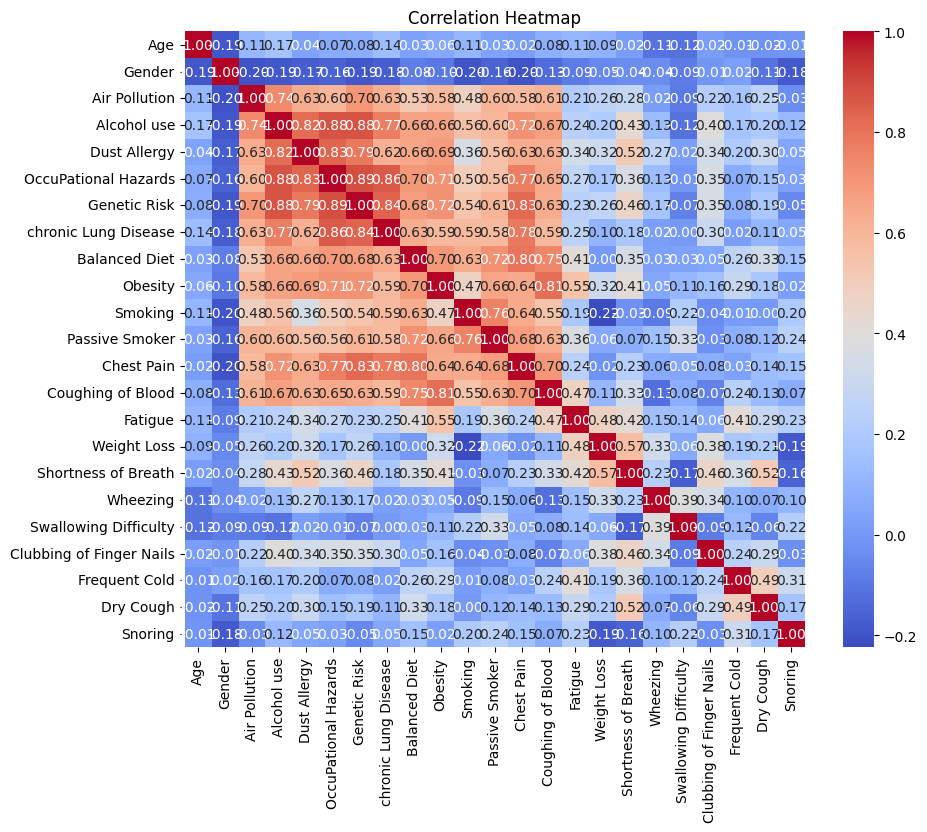

In [40]:
plt.figure(figsize=(10, 8))  
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Correlation Heatmap')  
plt.show()

In [41]:
y_train.head()

29     Medium
535      High
695    Medium
557    Medium
836       Low
Name: Level, dtype: object

In [42]:
X_train.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
29,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-1.178119,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105
535,1.318890,-0.819903,1.064362,1.312250,0.926842,1.025275,0.667941,1.418061,1.175473,-0.689782,...,0.470176,0.509919,-0.841101,0.332758,-0.870694,-0.328743,-0.805663,-1.384593,1.544171,2.085555
695,-0.764533,1.219657,-1.399439,0.548648,0.926842,0.075946,-0.743202,-1.288162,0.706970,-1.160623,...,-1.178119,-0.381548,-0.387677,1.208436,1.579206,0.111931,1.708106,1.891258,1.544171,1.407105
557,2.068922,-0.819903,1.064362,1.312250,0.926842,1.025275,1.138323,0.876816,-1.167040,-0.218941,...,-0.766045,-0.827281,1.426018,0.770597,0.599246,-1.210093,2.127068,-0.292643,0.072130,-0.628245
836,0.068836,-0.819903,-0.906679,-0.596755,-0.083340,-1.348047,-1.683965,-1.829407,-1.635543,-1.631465,...,-0.353971,-0.827281,-1.294525,-0.542921,0.109266,0.993281,-1.224625,-0.292643,-0.909231,-0.628245


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time


In [44]:
start_time = time.time()
svm_classifier = SVC(kernel='linear') 
svm_classifier.fit(X_train, y_train)
y_pred_train= svm_classifier.predict(X_test)
end_time = time.time()

training_time = end_time - start_time
print("Training time:", training_time, "seconds")
accuracy = accuracy_score(y_test, y_pred_train)
print("Accuracy:", accuracy*100)


Training time: 0.017535686492919922 seconds
Accuracy: 100.0


In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_train)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


In [46]:
conf_matrix_train = confusion_matrix(y_train, y_train)

print("Confusion Matrix on Training Data:")
print(conf_matrix_train)

Confusion Matrix on Training Data:
[[283   0   0]
 [  0 248   0]
 [  0   0 269]]
